In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Read data
df = pd.read_csv('3_spotify_5000_songs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 19 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   Unnamed: 0                                                                                                                                                                         5235 non-null   int64  
 1   name                                                                                                                                                                               5235 non-null   object 
 2   artist                                                  

In [3]:
# Undertsanding the table
df.describe(include='all')

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
count,5235.00000,5235,5235,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235,5.235000e+03,5235.000000,5235,5235
unique,NaN,5011,2176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,5171,5171
top,NaN,Scared to Be Lonely ...,Death,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,23L5CiUhw2jV1OIMwthR3S,https://open.spotify.com/track/23L5CiUhw2jV1OI...
freq,NaN,4,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5235,NaN,NaN,3,3
mean,2617.00000,NaN,NaN,0.509503,0.653565,5.254441,-9.338098,0.646227,0.083178,0.290043,0.257337,0.185354,0.443596,118.721407,NaN,2.479112e+05,3.902961,NaN,NaN
std,1511.35866,NaN,NaN,0.218041,0.288335,3.571559,6.294850,0.478185,0.071193,0.355985,0.370686,0.149410,0.277725,28.568463,NaN,1.356330e+05,0.420324,NaN,NaN
min,0.00000,NaN,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.276000e+04,0.000000,NaN,NaN
25%,1308.50000,NaN,NaN,0.309000,0.479000,2.000000,-11.337000,0.000000,0.039000,0.002450,0.000001,0.092500,0.196000,96.174000,NaN,1.899910e+05,4.000000,NaN,NaN
50%,2617.00000,NaN,NaN,0.539000,0.738000,5.000000,-7.338000,1.000000,0.055800,0.095400,0.001880,0.125000,0.417000,119.180000,NaN,2.246670e+05,4.000000,NaN,NaN
75%,3925.50000,NaN,NaN,0.688000,0.893000,8.000000,-5.264000,1.000000,0.098650,0.565500,0.643000,0.237000,0.677000,134.019000,NaN,2.717200e+05,4.000000,NaN,NaN


In [4]:
# understanging the Data framework = 5235 Rows and 19 colummns
df.shape

(5235, 19)

In [5]:
# Undertsanding the column_names
df.head(10)

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
5,5,Desafinado ...,Stan Getz,0.466,0.1460,3,-17.500,1,0.0649,0.931,0.154000,0.107,0.423,142.885,,249387,4,5pstSsK0G4q86gdyy1Spqh,https://open.spotify.com/track/5pstSsK0G4q86gd...
6,6,Madalena ...,Maria Gasolina,0.675,0.2070,11,-13.820,0,0.0545,0.963,0.414000,0.112,0.684,93.531,,145187,4,33u3dO0JWjerYpFN61J3ug,https://open.spotify.com/track/33u3dO0JWjerYpF...
7,7,O Meu Amor É Glòria ...,Sílvia Pérez Cruz,0.504,0.7330,7,-10.720,1,0.3890,0.696,0.000056,0.673,0.886,96.565,,309760,4,0ylJQpV3K4XnhWhLDMFmH7,https://open.spotify.com/track/0ylJQpV3K4XnhWh...
8,8,Brigas Nunca Mais ...,Paula Morelenbaum,0.694,0.5460,10,-11.452,1,0.0400,0.398,0.076000,0.153,0.641,170.032,,204027,4,1wL2dk42Cxu4zCJs4SvFsZ,https://open.spotify.com/track/1wL2dk42Cxu4zCJ...
9,9,Previsao ...,Bossacucanova,0.674,0.8640,1,-7.971,1,0.0382,0.641,0.358000,0.139,0.536,99.995,,181133,4,5iKuMCDh634YGrg2HrhtHp,https://open.spotify.com/track/5iKuMCDh634YGrg...


In [6]:
# Knowing the data types
df.dtypes

Unnamed: 0                                                                                                                                                                             int64
name                                                                                                                                                                                  object
artist                                                                                                                                                                                object
danceability                                                                                                                                                                         float64
energy                                                                                                                                                                               float64
key                                                    

In [7]:
# Finding Missing values
missing_values = df.isnull().sum()
missing_values

Unnamed: 0                                                                                                                                                                           0
name                                                                                                                                                                                 0
artist                                                                                                                                                                               0
danceability                                                                                                                                                                         0
energy                                                                                                                                                                               0
key                                                                                  

In [8]:
# Drop columns multiple column
# Strip whitespace from column names
df.columns = df.columns.str.strip()
# Now try dropping the columns
df = df.drop(['Unnamed: 0', 'type', 'html'], axis=1)
df

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4,1aEhYlZtypmipA06SDJ4U3
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4,1Gfqe7TAKklmuZf6hxsH6h
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3,2XNwnFrdMDpismp0VUZ7cU
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4,7ucDwgMtE3YJtEfTbuRhy0


In [9]:
df.duplicated().sum()

64

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(5171, 16)

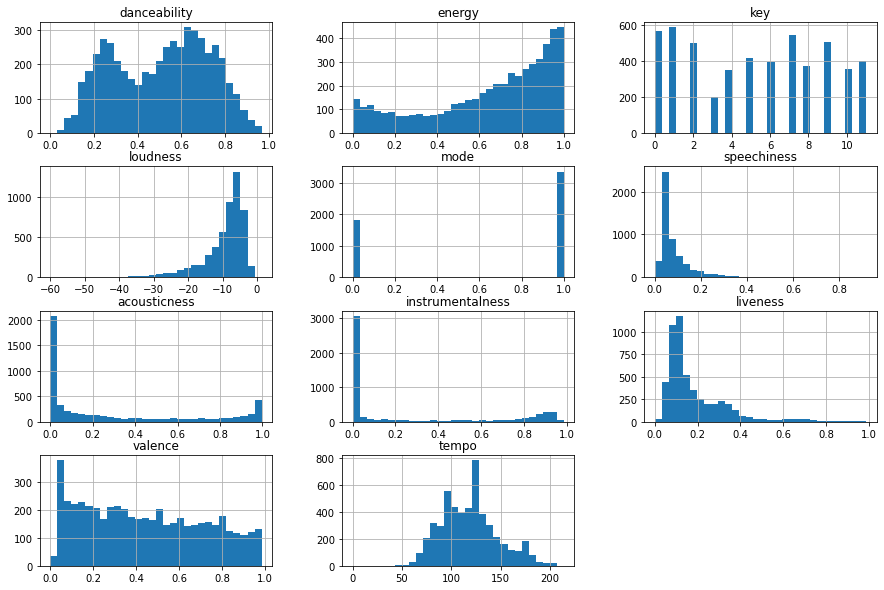

In [11]:
# Plotting distributions for key features
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df[features].hist(figsize=(15, 10), bins=30)
plt.show()


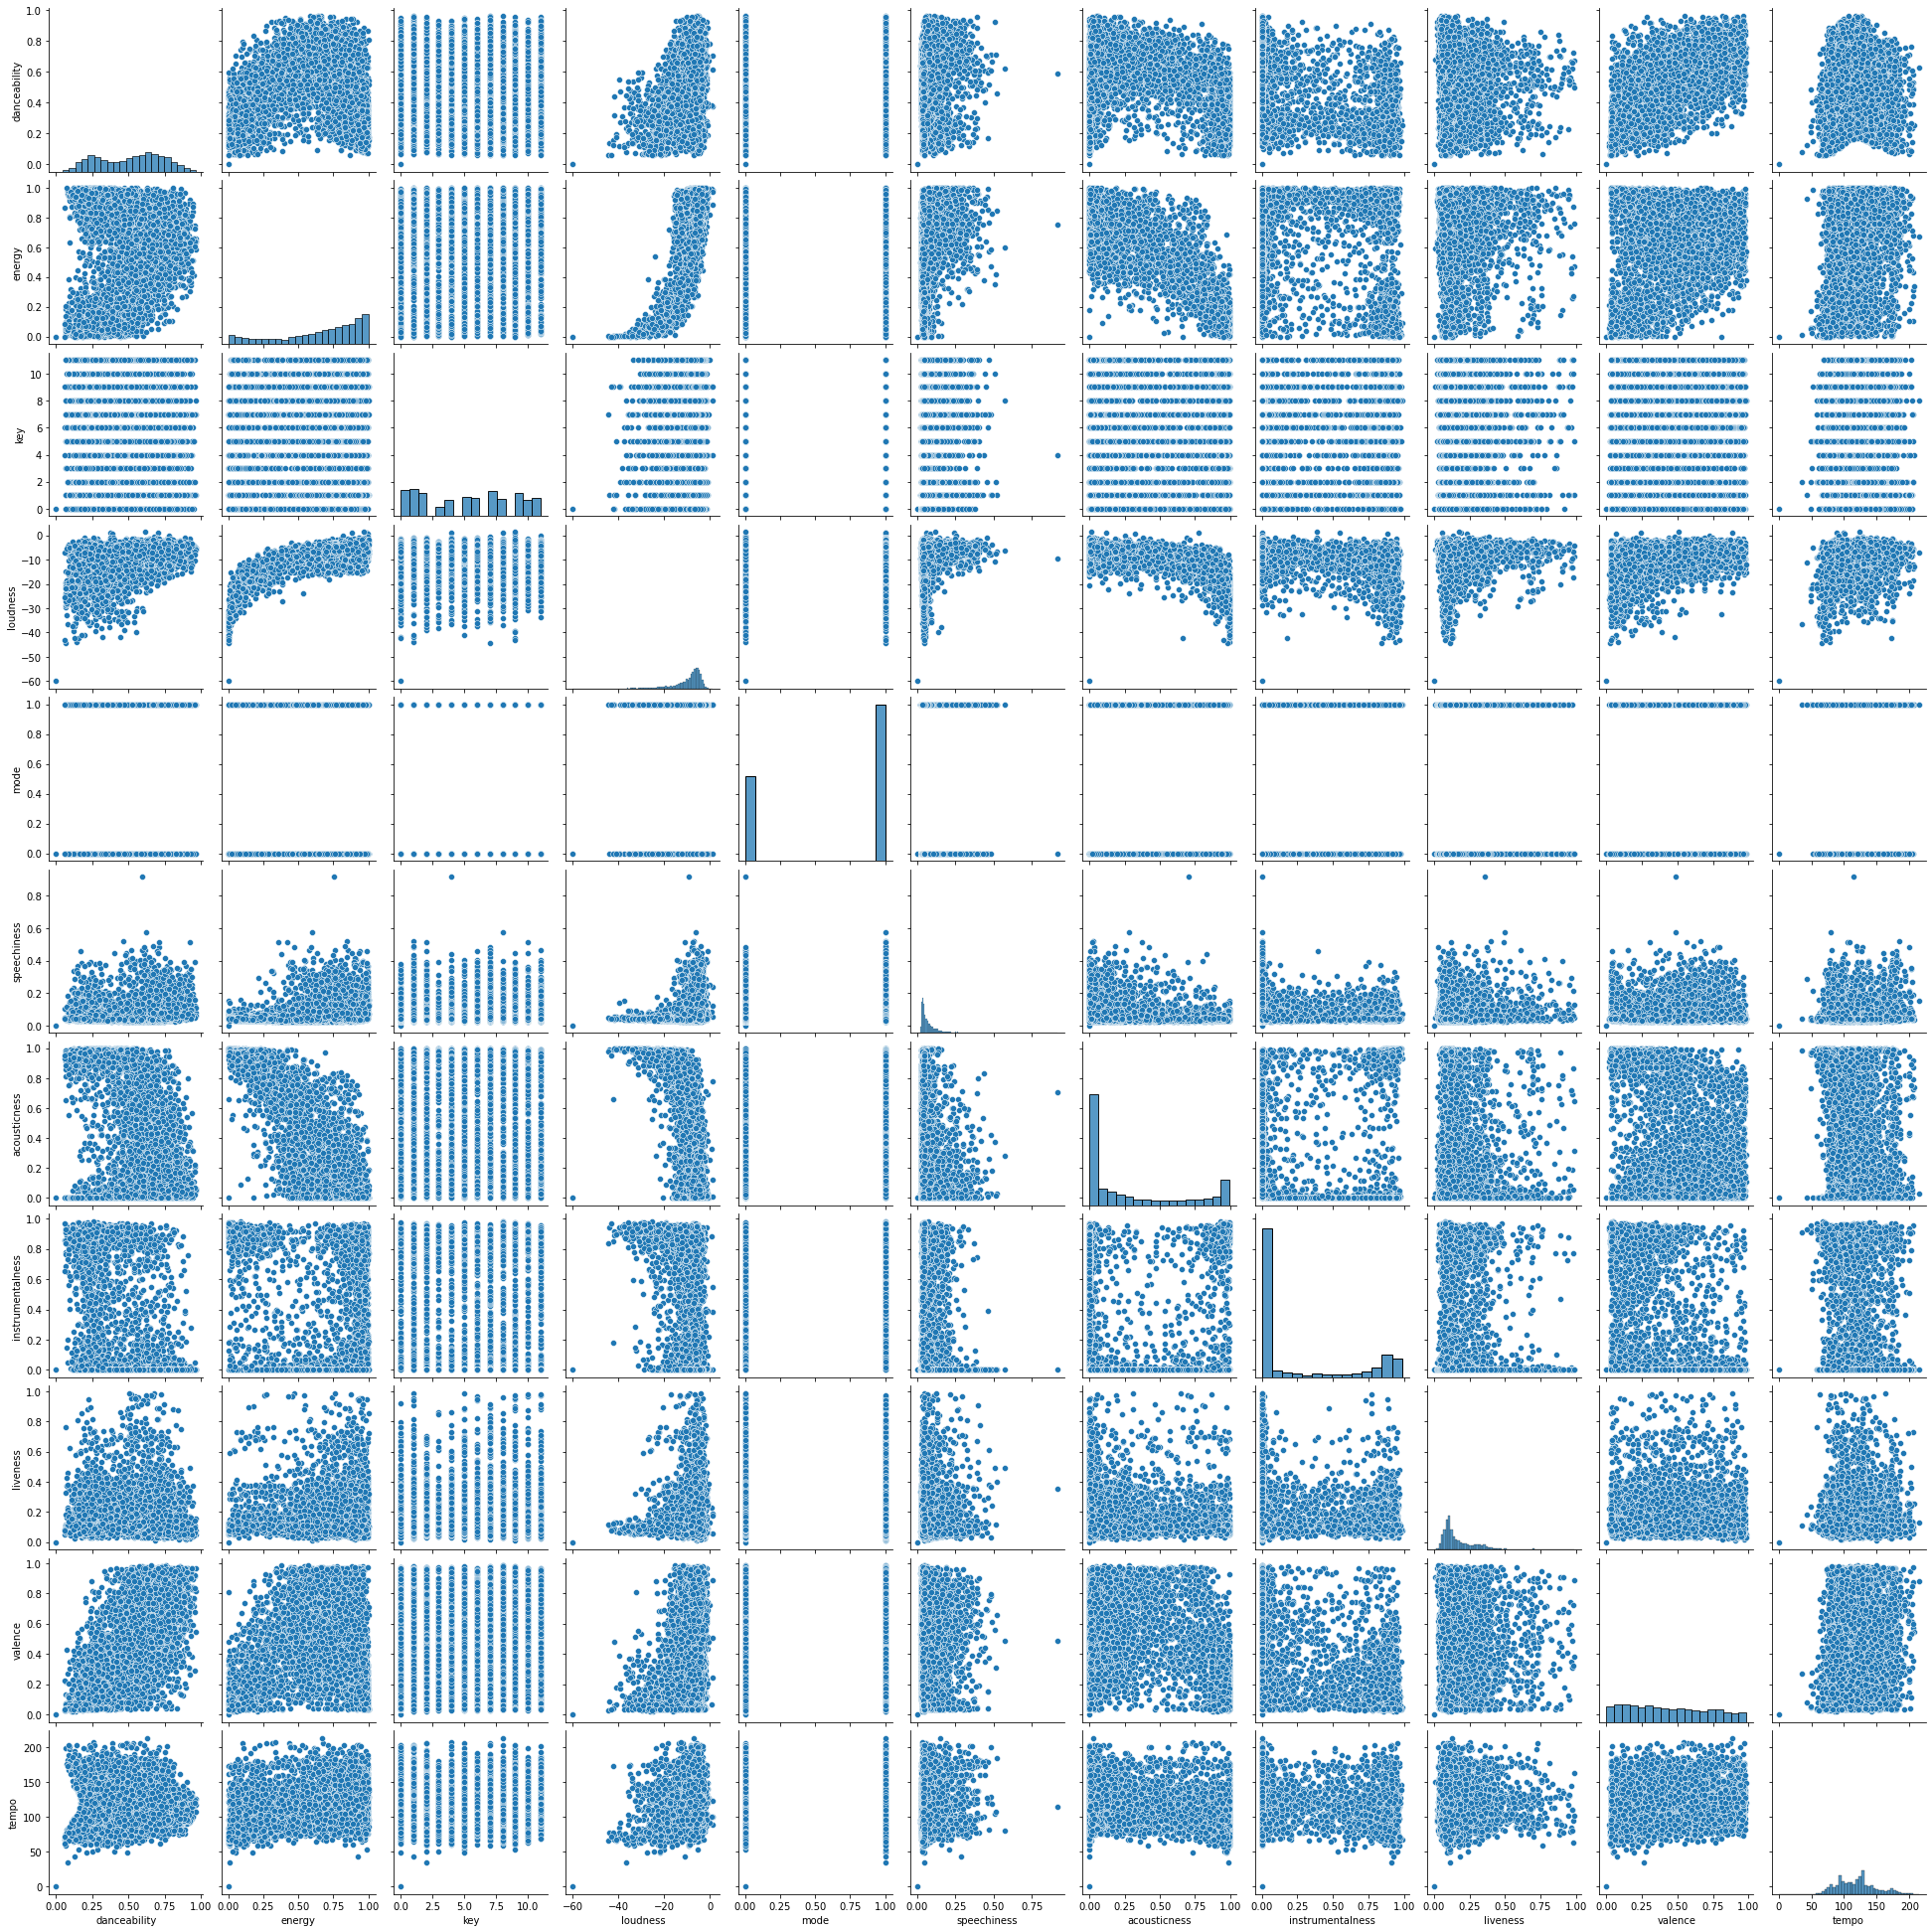

In [12]:
# Pairplot to explore relationships
sns.pairplot(df[features])
plt.show()

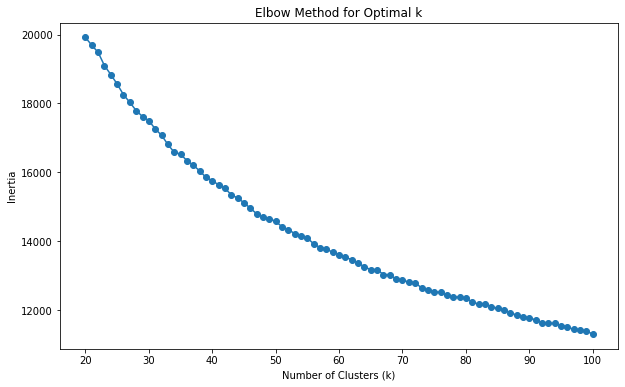

In [13]:
# Features for clustering
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# Create a new dataframe with selected features
X = df[features]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate inertia for different number of clusters
def calculate_inertia(max_clusters):
    inertias = []
    for k in range(20, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    return inertias

# Calculate inertia for up to 100 clusters
max_clusters = 100
inertias = calculate_inertia(max_clusters)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(20, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



In [14]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=40, random_state=42) 
labels = kmeans.fit_predict(X_scaled)

# Step 4: Calculate Silhouette Score
sil_score = silhouette_score(X_scaled, labels)

print(f'Silhouette Score for 40 clusters: {sil_score:.4f}')

Silhouette Score for 40 clusters: 0.1410


In [15]:
# Perform K-means clustering with the chosen number of clusters
n_clusters = 40
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,cluster
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,35
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,8
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,24
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs,37
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA,10


In [16]:
# Calculate the size of each cluster
cluster_sizes = df['cluster'].value_counts().sort_index()
print(cluster_sizes)

0     120
1     265
2     104
3     135
4     145
5     167
6     191
7      85
8     156
9     160
10    102
11    172
12    106
13     38
14    110
15    162
16    117
17    143
18    130
19    102
20    234
21    117
22    126
23    104
24    133
25    203
26     77
27     96
28    108
29    189
30     70
31     76
32     81
33     88
34    192
35     37
36     89
37     95
38    192
39    154
Name: cluster, dtype: int64


In [17]:
# Calculate mean values of features for each cluster
cluster_means = df.groupby('cluster')[features].mean()

cluster_means

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,,
0,0.299067,0.913458,2.533333,-6.634667,0.991667,0.103373,0.018359,0.099274,0.204717,0.233459,100.002867
1,0.721853,0.714792,7.584906,-6.865736,1.000000,0.058335,0.129137,0.033047,0.104336,0.758264,112.462396
2,0.318888,0.113351,8.096154,-22.344048,0.750000,0.045434,0.959865,0.839423,0.117736,0.161583,146.907000
3,0.269160,0.899541,9.118519,-8.632452,0.000000,0.108759,0.009138,0.798874,0.173209,0.233722,130.454711
4,0.667924,0.789772,7.075862,-5.762131,1.000000,0.059903,0.136267,0.028872,0.350338,0.623342,113.072966
5,0.262037,0.901587,1.520958,-8.493515,1.000000,0.103989,0.007832,0.826222,0.178814,0.229954,104.200707
6,0.626623,0.785901,8.785340,-5.281257,0.000000,0.055481,0.071847,0.066704,0.180962,0.383295,123.571545
7,0.647847,0.712506,8.164706,-6.731765,0.000000,0.090956,0.185422,0.034457,0.200233,0.717271,159.443282
8,0.643462,0.479872,1.628205,-10.557808,1.000000,0.048524,0.593109,0.062593,0.159265,0.708365,108.684705


In [18]:
# Save the DataFrame with cluster labels to a CSV file
df[['id', 'cluster']].to_csv('clustered_songs_two.csv', index=False)